# 서울시 범죄 현황 분석
[참고 사이트](https://jfun.tistory.com/215?category=828812)  
[제공 데이터](https://github.com/chris1610/pbpython/tree/master/data)

In [1]:
import numpy as np
import pandas as pd

In [3]:
# 살인, 강도, 강간, 절도, 폭력이라는 5대 범죄에 대한 발생 건수와 검거 건수.
crime_anal_police = pd.read_csv('data/02. crime_in_Seoul.csv',
                               thousands=',',
                               encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


---
#### pandas의 pivot_table 학습하기

In [5]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df= pd.read_excel('data/salesfunnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [7]:
#Name 항목으로만 정렬하고 싶을때 pivot_table을 사용한다.
pd.pivot_table(df, index=['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [8]:
# Index를 여러 개 지정할 수 있다.
pd.pivot_table(df, index = ['Name', 'Rep', 'Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [12]:
# 특정 value만 지정해서 나타나도록 할 수도 있다.
# value 값은 "평균"이 기본값이다.
pd.pivot_table(df, index = ['Manager', 'Rep'], values = ['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [13]:
# value 값의 합계를 구하고 싶다면, aggfunc 옵션의 np.sum을 사용한다.
# aggfunc = 'sum' or aggfunc = np.sum 둘 다 가능
pd.pivot_table(df, index = ['Manager', 'Rep'], values=['Price'], aggfunc='sum')

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [14]:
#Index와 value를 지정하고, 각 value에 대해 합과 평균을 표시하도록 한다.
#Nan이 나타나면 0으로 채운다.

pd.pivot_table(df, index = ['Manager', 'Rep', 'Product'],
              values = ['Price', 'Quantity'],
              aggfunc = [np.sum, np.mean],
              fill_value=0, 
               margins=True) # 총계 계산

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

---
## Pivot_tabel을 이용해서 데이터 정리하기

In [126]:
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv',
                             encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [128]:
#index_col=0을 사용하면 저장되어 있는 index를 index로 사용한다.
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv',
                             encoding='utf-8', index_col=0)

# pivot_table을 이용하여 데이터를 관서별에서 구별로 바꾸자
crime_anal = pd.pivot_table(crime_anal_raw, index='구별',aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [129]:
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

# 검거 건수는 검거율로 대체할 수 있어서 삭제한다.
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [130]:
# 검거율이 100 이상인 데이터는 100으로 처리한다.
con_list = crime_anal.columns.tolist()[6:]

for name in con_list:
    crime_anal.loc[crime_anal[name] > 100, name] = 100 # 100 이상은 100으로 처리

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [131]:
# 컬럼명에 발생이라는 단어를 삭제하자.
crime_anal.rename(columns={'강간 발생':'강간', # "기존 컬럼명":"새로운 컬럼명"
                          '강도 발생':'강도',
                          '살인 발생':'살인',
                          '절도 발생':'절도',
                          '폭력 발생':'폭력'}, inplace = True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


## 데이터 표현을 위해 다듬기
각 항목의 최대값을 1로 두면 추후 범죄 건수를 종합적으로 비교할 때 편리할 것이다. 우리는 이런 방법을 정규화 라고 한다.

In [132]:
from sklearn.preprocessing import MinMaxScaler

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled,
                              columns=col,
                              index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [133]:
# 구별 인구수와 CCTV 개수를 가져오자
result_CCTV = pd.read_csv('data/01. CCTV_result.csv', encoding='utf-8',
                         index_col='구별')
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [134]:
# 각 범죄 발생 건수에 대해 합을 구해 '범죄'라는 컬럼을 만들자 
crime_anal_norm['범죄'] = np.sum(crime_anal_norm.loc[:, '강간':'폭력'], axis = 1)

In [135]:
# 위와 마찬가지로 각 검거율의 합을 구하여 '검거'라는 컬럼을 만들자
crime_anal_norm['검거'] = np.sum(crime_anal_norm.loc[:, '강간검거율':'폭력검거율'], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


---
#### 좀 더 편리한 시각화 도구 - Seaborn

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


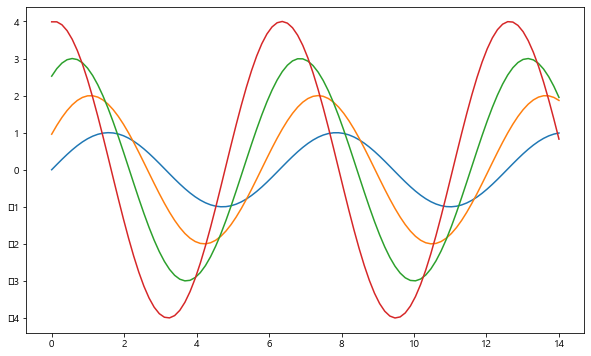

In [136]:
# 몇 개의 사인함수를 그려보자.
# seaborn을 import 할 때는 matplotlib도 같이 import 되어 있어야 한다.
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

x = np.linspace(0, 14, 100) # 1차원의 배열 생성(np.linspace(start, stop, num))
y1 = np.sin(x)
y2 = 2*np.sin(x+.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize = (10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

In [61]:
np.linspace(0, 14, 100)

array([ 0.        ,  0.14141414,  0.28282828,  0.42424242,  0.56565657,
        0.70707071,  0.84848485,  0.98989899,  1.13131313,  1.27272727,
        1.41414141,  1.55555556,  1.6969697 ,  1.83838384,  1.97979798,
        2.12121212,  2.26262626,  2.4040404 ,  2.54545455,  2.68686869,
        2.82828283,  2.96969697,  3.11111111,  3.25252525,  3.39393939,
        3.53535354,  3.67676768,  3.81818182,  3.95959596,  4.1010101 ,
        4.24242424,  4.38383838,  4.52525253,  4.66666667,  4.80808081,
        4.94949495,  5.09090909,  5.23232323,  5.37373737,  5.51515152,
        5.65656566,  5.7979798 ,  5.93939394,  6.08080808,  6.22222222,
        6.36363636,  6.50505051,  6.64646465,  6.78787879,  6.92929293,
        7.07070707,  7.21212121,  7.35353535,  7.49494949,  7.63636364,
        7.77777778,  7.91919192,  8.06060606,  8.2020202 ,  8.34343434,
        8.48484848,  8.62626263,  8.76767677,  8.90909091,  9.05050505,
        9.19191919,  9.33333333,  9.47474747,  9.61616162,  9.75

---
## 범죄 데이터 시각화하기

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family = 'Malgun Gothic')

%matplotlib inline

In [69]:
# 데이터를 다시 한번 확인하고
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,검거,범죄
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,369.707384,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,370.084431,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,406.943540,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,368.622261,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,416.915211,2.034438


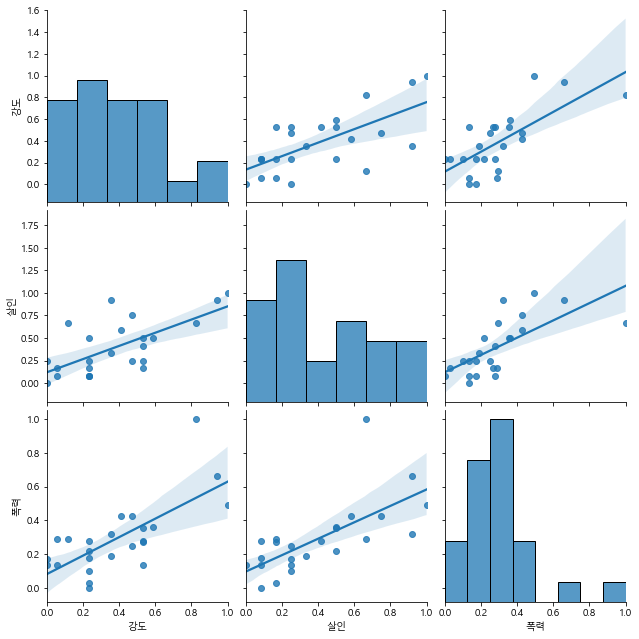

In [64]:
# 강도와 폭력, 살인과 폭력, 강도와 살인의 상관관계를 확인하자
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', height=3)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


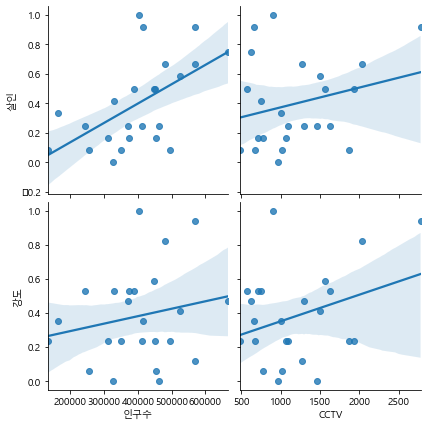

In [65]:
# 인구수, CCTV개수와 살인, 강도의 상관관계
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'],
             y_vars=['살인', '강도'], kind='reg', height=3)
plt.show()

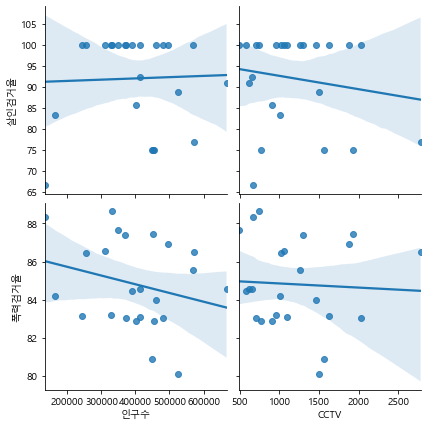

In [66]:
# 인구수, CCTV와 살인검거율, 폭력검거율의 상관관계
sns.pairplot(crime_anal_norm,
            x_vars=['인구수', 'CCTV'],
            y_vars=['살인검거율', '폭력검거율'], kind='reg', height=3)
plt.show()

In [73]:
# 검거율의 합계인 검거 항목 최고 값을 100으로 한정하고 그 값으로 정렬
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by = '검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,검거,범죄
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,103.921569,100.0,100.0,44.967074,87.626093,348646.0,485,100.000000,0.318627
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,97.116751,0.589867
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,95.509997,2.034438
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,94.586797,1.490147
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,93.925332,1.346674


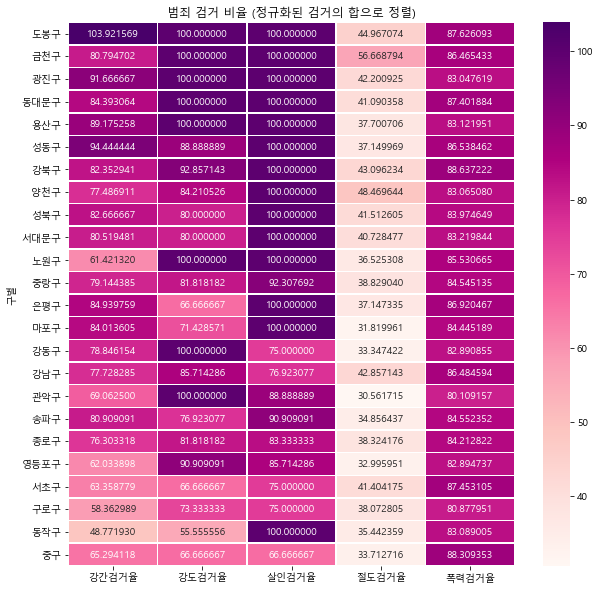

In [77]:
# 범죄 검거 비율 heatmap으로 시각화
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], 
            annot = True, # 각 셀에 숫자를 입력
            fmt='f', # 각 셀에 입력되는 데이터 타입(f=float)
           linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

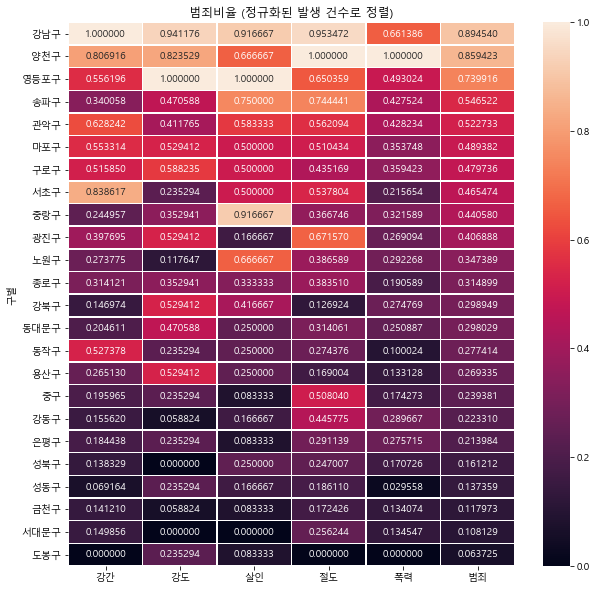

In [78]:
# 범죄 발생 건수 heatmap 시각화
target_col=['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
plt.figure(figsize=(10,10))

sns.heatmap(crime_anal_norm_sort[target_col], 
            annot=True, 
            fmt='f', 
            linewidth=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

---
#### 지도 시각화 도구 - folium

In [79]:
# folium import
import folium
import matplotlib.pyplot as plt

In [81]:
#위도와 경도를 보여주면 지도를 그려준다.
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

In [82]:
# zoom_start를 이용하여 확대 비율 조정가능
stamen = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
map_osm

In [83]:
# 타일 옵션을 사용하여 지도를 만든다.
stamen = folium.Map(location=[45.5236, -122.6750], 
                    tiles='Stamen Toner', # 타일 옵션 설정
                    zoom_start=13)
stamen

In [84]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12,
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1

In [86]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12, 
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker([45.3300, -121.6823], popup='Some Other Location', 
              icon=folium.Icon(color='red',icon='info-sign')).add_to(map_1)
map_1

In [90]:
# 지도를 그리고 그 상태에서 원하는 좌표에 Marker 명령으로 마크를 찍는다.
# CircleMarker 명령으로 반경과 색상을 지정하여 원을 그린다.
map_2 = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner',
                   zoom_start=13)
folium.Marker([45.5244, -122.6699], popup='The Waterfront').add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], radius=50,
                            popup='Laurelhurst park', color='#3186cc',
                            fill_color='#3186cc', ).add_to(map_2)
map_2

In [92]:
map_3 = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
folium.RegularPolygonMarker([45.5012, -122.6655], 
                            popup='Ross Island Bridge', fill_color='#132b5e', 
                            number_of_sides=3, radius=10).add_to(map_3)
folium.RegularPolygonMarker([45.5132, -122.6708], 
                            popup='Hawthorne Bridge', fill_color='#45647d', 
                            number_of_sides=4, radius=10).add_to(map_3)
folium.RegularPolygonMarker([45.5275, -122.6692], 
                            popup='Steel Bridge', fill_color='#769d96', 
                            number_of_sides=6, radius=10).add_to(map_3)
folium.RegularPolygonMarker([45.5318, -122.6745], 
                            popup='Broadway Bridge', fill_color='#769d96', 
                            number_of_sides=8, radius=10).add_to(map_3)
map_3

아래 주소에서

1. folium_US_Unemployment_Oct2012.csv
1. folium_us-states.json  

받을것

[참고](https://github.com/PinkWink/DataScience/tree/master/data)

In [93]:
import folium
import pandas as pd

In [138]:
state_unemployment = 'data/02. folium_US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [103]:
# state_geo라는 변수에 json 파일 경로를 담고, 
#folium에서 choropleth 명령으로 json 파일과 지도에 표현하고 싶은 데이터를 입력하고
#key_on 옵션으로 지도의 id를 알려주면 된다.(id 중복되면 안됨)

state_geo = 'data/02. folium_us-states.json'

map = folium.Map(location=[40,-98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data,
               columns=['State', 'Unemployment'],
               key_on='feature.id',
               fill_color='YlGn',
               legend_name='Unemployment Rate (%)')
map

---
## 서울시 범죄율에 대한 지도 시각화

우리가 열심히 다듬은 자료를 시각화 해보기 위해서는 서울시 '구'별 경계선을 그릴 수 있는 json 파일이 있어야 한다.  
https://github.com/southkorea/southkorea-maps
kostat > 2013 > json > skorea_municipalities_geo_simple.json 에서 받아올 수 있다.  
하지만 이것을 우리가 아직 편집할수는 없으므로
https://github.com/PinkWink/DataScience/tree/master/data
에서 편집된 02. skorea_municipalities_geo_simple.json을 받아준다.

In [104]:
# json파일 로딩
import json
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [105]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 살인 발생 건수로 지정하자.

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map

In [108]:
# 강간 발생 건수로 다시 그려보자.

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['강간'],
               columns = [crime_anal_norm.index, crime_anal_norm['강간']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map

In [110]:
# 범죄 발생건수

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map

인구수를 고려해야 할 것 같다. 즉 인구 대비 범죄 발생 비율을 알아보는 것이다.

In [113]:
# 범죄 전체 발생건수에 인구수를 나누고 소수점 밑으로 가서 적절한 값을 곱한다.
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles = 'Stamen Toner')
map.choropleth(geo_data = geo_str,
              data = tmp_criminal,
              columns=[crime_anal.index, tmp_criminal],
              fill_color = 'PuRd',
              key_on = 'feature.id')
map

## 서울시 경찰서별 검거율과 구별 범죄 발생율을 동시에 시각화하기
이번에는 경찰서별 검거율과 방금 전까지 수행한 범죄 발생율을 동시에 표현해보자.



In [139]:
station_lat = [37.5636171,37.575548,37.5549064,37.5596928,37.5718529,37.541126,37.5897783,37.5849574,
37.5507204,37.5179707,37.5617303,37.5128569,37.5428825,37.6123992,37.6371974,37.4564307,
37.6126681,37.5091124,37.4794085,37.5397685,37.528511,37.6019994,37.4947449,37.4952559,37.5167711,
37.5016941,37.6425238,37.4947436,37.6280204,37.6537018,37.4932277]

In [140]:
station_lng = [126.9896517,126.9847471,126.97362,126.9711197,126.9989143,126.9675322,127.016589,127.045752,126.9542358,
126.907501,127.0364217,126.9426962,127.0837581,126.9292744,127.0273048,126.8970523,127.1032127,127.0671097,
126.9535822,126.8299931,127.1268224,127.0322276,126.8865872,127.0054603,126.8656996,127.1272481,127.0717076,
126.9833846,126.9287899,127.0528025,127.0769693]

In [143]:
#검거만 따로 모아두고 앞에서 수집해둔 경찰서의 위도와 경도 정보를 이용하자.
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

# 각 범죄 유형의 합을 나타내는 '검거' 컬럼을 생성한다.
col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()

crime_anal_raw['검거'] = np.sum(tmp, axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563617,126.989652,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554906,126.973620,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.559693,126.971120,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [165]:
#경찰서 위치를 확인하자.
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n],
                   crime_anal_raw['lng'][n]]).add_to(map)
    
map

In [166]:
# 검거에 적당한 값 10을 곱해서 원 넓이를 정하고, 경찰서의 검거율을 원의 넓이로 표현하자.
map =folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],
                       radius = crime_anal_raw['검거'][n]*10,
                       color='#3186cc', fill_color='#3186cc').add_to(map)
map

In [171]:
# 색상을 붉은 색으로 해서 범죄 발생 건수를 넣자.
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on='feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],
                        radius = crime_anal_raw['검거'][n]*10,
                        color='#3186cc', fill_color='#3186cc').add_to(map)
map

In [173]:
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563617,126.989652,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554906,126.973620,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.559693,126.971120,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382
